# Bài thực hành K-Means 1


In [ ]:
#import dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("youssefaboelwafa/clustering-penguins-species")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'clustering-penguins-species' dataset.
Path to dataset files: /kaggle/input/clustering-penguins-species


In [ ]:
# import các thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warningsdc

In [ ]:
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
# đọc dataset
penguins_df = pd.read_csv("/kaggle/input/clustering-penguins-species/penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


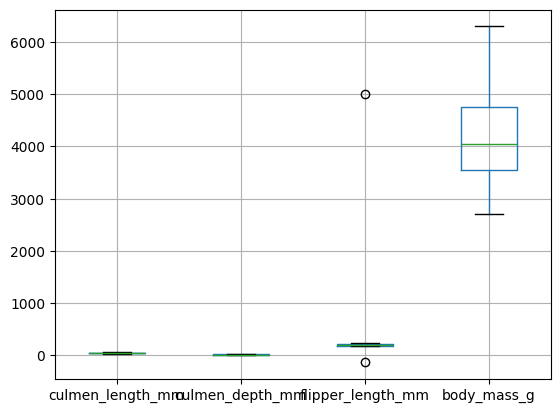

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


In [ ]:
# làm sạch dữ liệu, kiểm tra ngoại lai, bỏ các hàng có giá trị thiếu
penguins_df.boxplot()
plt.show()
penguins_df = penguins_df.dropna()
penguins_df[penguins_df["flipper_length_mm"] > 4000]
penguins_df[penguins_df["flipper_length_mm"] < 0]
penguins_clean = penguins_df.drop([9, 14])
penguins_clean.head()

In [ ]:
# tạo dummies
df = pd.get_dummies(penguins_clean).drop("sex_.", axis=1)
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True
1,39.5,17.4,186.0,3800.0,True,False
2,40.3,18.0,195.0,3250.0,True,False
4,36.7,19.3,193.0,3450.0,True,False
5,39.3,20.6,190.0,3650.0,False,True


In [ ]:
# chuẩn hóa dataframe
scaler = StandardScaler()
X = scaler.fit_transform(df)
penguins_preprocessed = pd.DataFrame(data=X, columns=df.columns)
penguins_preprocessed.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.905520,0.793126,-1.428125,-0.569709,-0.991031,0.997001
1,-0.831938,0.128503,-1.071522,-0.507579,1.009050,-1.003008
2,-0.684775,0.435252,-0.429637,-1.191006,1.009050,-1.003008
3,-1.347011,1.099875,-0.572278,-0.942487,1.009050,-1.003008
4,-0.868729,1.764498,-0.786240,-0.693968,-0.991031,0.997001
5,-0.942311,0.333002,-1.428125,-0.725033,1.009050,-1.003008
6,-0.887125,1.253249,-0.429637,0.579691,-0.991031,0.997001
7,-0.537611,0.230753,-1.356804,-1.253136,1.009050,-1.003008
8,-0.997497,2.071247,-0.714919,-0.507579,-0.991031,0.997001
9,-1.365406,0.333002,-1.142843,-0.631839,1.009050,-1.003008


In [ ]:
# Phân tích thành phần chính (PCA), giúp giảm kích thước dữ liệu và giảm nhiễu
pca = PCA(n_components=None)
dfx_pca = pca.fit(penguins_preprocessed)
dfx_pca.explained_variance_ratio_
n_components = sum(dfx_pca.explained_variance_ratio_ > 0.1)
pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)
print(n_components)

2


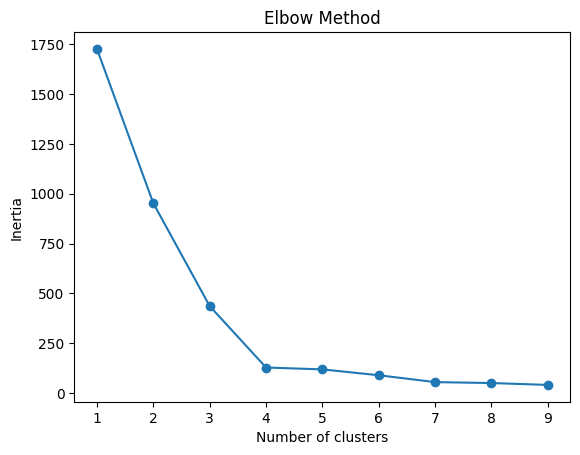

In [ ]:
# tìm số cụm k tối ưu cho K-Means
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_PCA)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()
n_clusters = 4

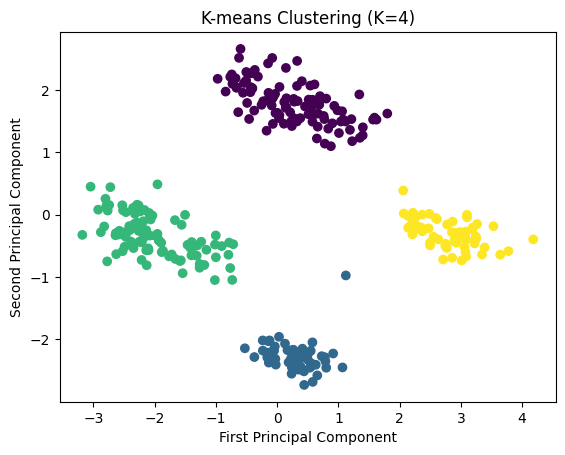

In [ ]:
# chạy K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_PCA)
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_, cmap="viridis")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title(f"K-means Clustering (K={n_clusters})")
plt.show()

#Bài thực hành K-Means 2

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hellbuoy/online-retail-customer-clustering")

print("Path to dataset files:", path)

100%|██████████| 7.22M/7.22M [00:00<00:00, 109MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/hellbuoy/online-retail-customer-clustering/versions/1


In [ ]:
# đọc dataset
retail_df = pd.read_csv(path + "/OnlineRetail.csv", encoding='unicode_escape')
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
# làm sạch dữ liệu
retail_df.info()
retail_df.dropna(subset=['Description'], inplace=True)
retail_df.dropna(subset=['CustomerID'], inplace=True)
retail_df = retail_df[retail_df['Quantity'] > 0]
retail_df = retail_df[retail_df['UnitPrice'] > 0]
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  obje

In [ ]:
# chuẩn hóa dữ liệu
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'], format='%d-%m-%Y %H:%M')
retail_df['TotalPrice'] = retail_df['Quantity'] * retail_df['UnitPrice']
latest_date = retail_df['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm_df = retail_df.groupby('CustomerID').agg(
    Recency=('InvoiceDate', lambda date: (latest_date - date.max()).days),
    Frequency=('InvoiceNo', 'nunique'),
    Monetary=('TotalPrice', 'sum')
).reset_index()
rfm_df['CustomerID'] = rfm_df['CustomerID'].astype(int)
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']])
rfm_df_scaled = pd.DataFrame(rfm_scaled, columns=['Recency_scaled','Frequency_scaled','Monetary_scaled'])
display(rfm_df_scaled.head())

,Recency_scaled,Frequency_scaled,Monetary_scaled
0,2.334574,-0.425097,8.358668
1,-0.905340,0.354417,0.250966
2,-0.175360,-0.035340,-0.028596
3,-0.735345,-0.425097,-0.033012
4,2.174578,-0.425097,-0.191347


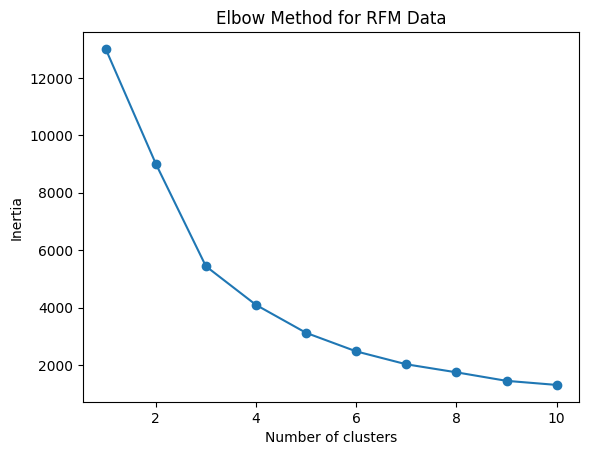

In [ ]:
# tìm số cụm k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_df_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for RFM Data")
plt.show()

In [ ]:
optimal_clusters = 3
print(f" {optimal_clusters}")

 3


In [ ]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
kmeans.fit(rfm_df_scaled)
rfm_df['Cluster'] = kmeans.labels_
display(rfm_df.head())

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346,326,1,77183.60,0
1,12347,2,7,4310.00,1
2,12348,75,4,1797.24,1
3,12349,19,1,1757.55,1
4,12350,310,1,334.40,0


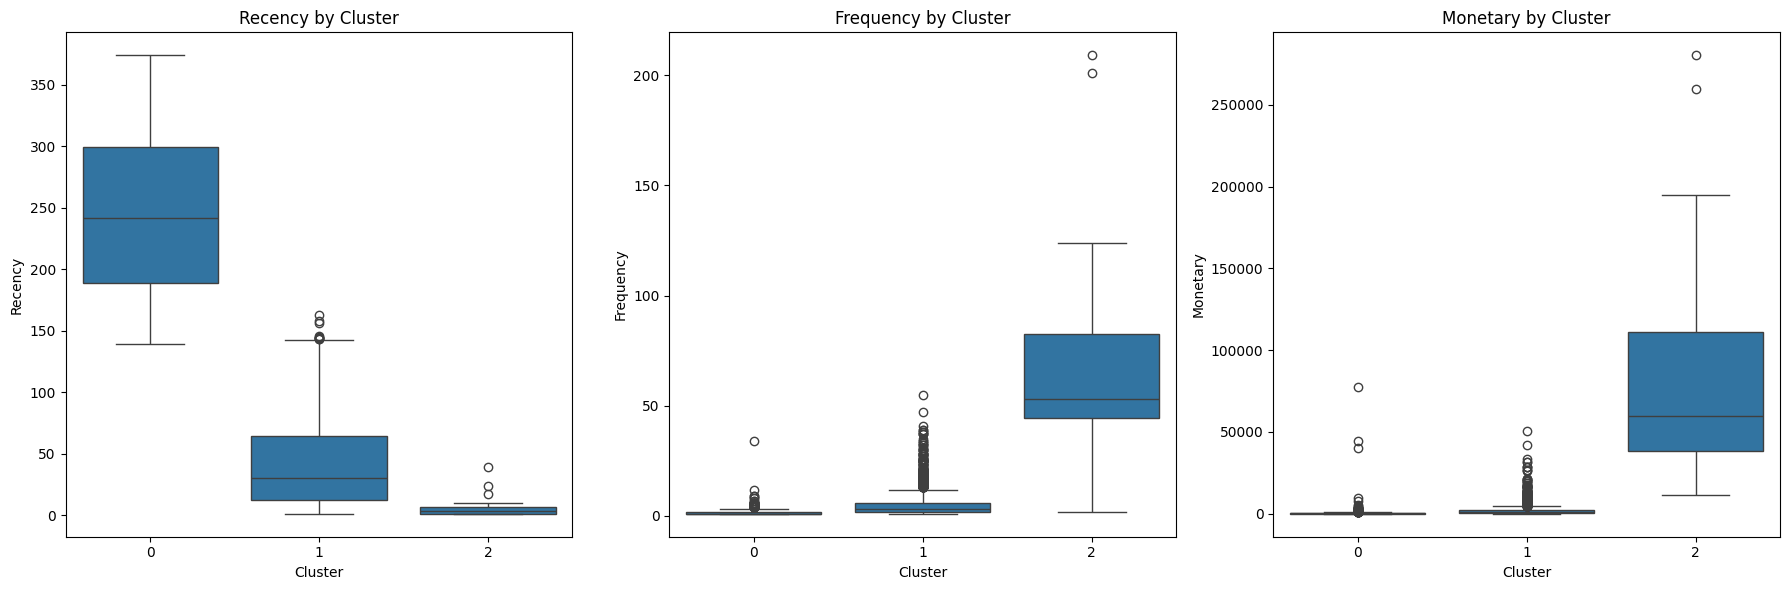

In [ ]:
#trực quan hóa kết quả
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x='Cluster', y='Recency', data=rfm_df, ax=axes[0])
axes[0].set_title('Recency by Cluster')

sns.boxplot(x='Cluster', y='Frequency', data=rfm_df, ax=axes[1])
axes[1].set_title('Frequency by Cluster')

sns.boxplot(x='Cluster', y='Monetary', data=rfm_df, ax=axes[2])
axes[2].set_title('Monetary by Cluster')

plt.tight_layout()
plt.show()

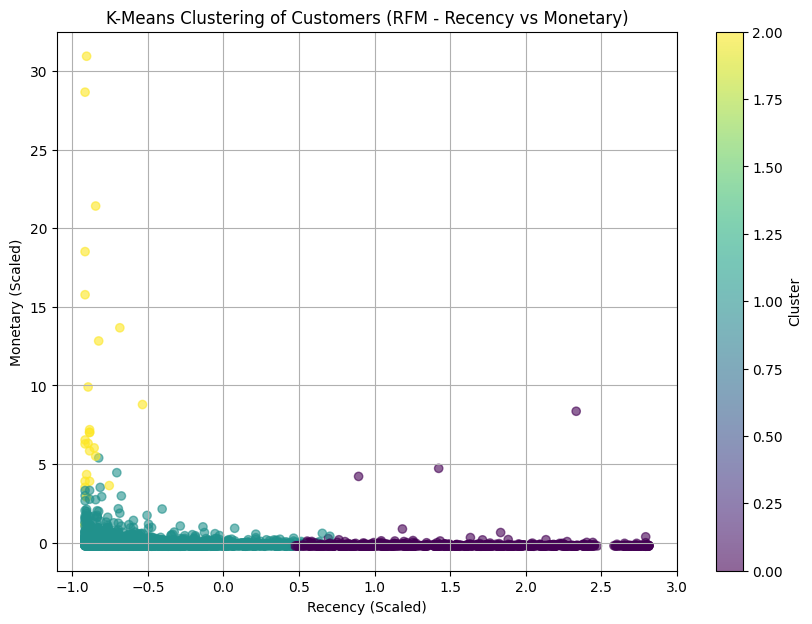

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
scatter = plt.scatter(rfm_df_scaled['Recency_scaled'], rfm_df_scaled['Monetary_scaled'], c=rfm_df['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Recency (Scaled)')
plt.ylabel('Monetary (Scaled)')
plt.title('K-Means Clustering of Customers (RFM - Recency vs Monetary)')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

#3.2.3. Bài tập thực hành phân cụm đa cấp 1

##Import data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
import os


warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
file_path = "penguins.csv"
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"


if os.path.exists(file_path):
    print("File đã có sẵn.")
else:
    print("File chưa tồn tại, đang tải dữ liệu...")
    penguins = pd.read_csv(url)
    penguins.to_csv(file_path, index=False)
    print("Tải file thành công!")

# Đọc dữ liệu
penguins = pd.read_csv(file_path)
penguins = penguins.dropna()
X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
print("Dữ liệu:", X.shape)
df = pd.read_csv(file_path)

File chưa tồn tại, đang tải dữ liệu...
Tải file thành công!
Dữ liệu: (333, 4)


In [ ]:
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


##Xử lý null và giá trị ngoại lệ

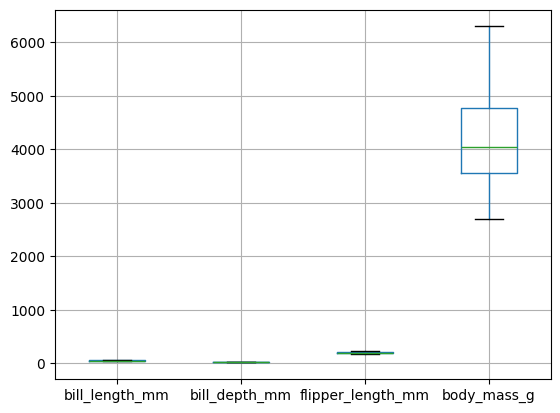

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [ ]:
penguins_df.boxplot()
plt.show()
penguins_df = penguins_df.dropna()
penguins_df[penguins_df["flipper_length_mm"] > 4000]
penguins_df[penguins_df["flipper_length_mm"] < 0]
penguins_clean = penguins_df.dropna()
penguins_clean = penguins_clean[penguins_clean["flipper_length_mm"] > 0]
penguins_clean.head()

##Tiền xử lý dữ liệu

In [ ]:
df = pd.get_dummies(penguins_clean, columns=['sex'])
df.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,False,True
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,True,False
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,True,False
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,True,False
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,False,True


##Tiền xử lý - scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Chỉ giữ các cột số (bỏ species, island)
numeric_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex_FEMALE', 'sex_MALE']

scaler = StandardScaler()
X = scaler.fit_transform(df[numeric_cols])

penguins_preprocessed = pd.DataFrame(data=X, columns=numeric_cols)
penguins_preprocessed.head()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.896042,0.780732,-1.426752,-0.568475,-0.991031,0.991031
1,-0.822788,0.119584,-1.069474,-0.506286,1.009050,-1.009050
2,-0.676280,0.424729,-0.426373,-1.190361,1.009050,-1.009050
3,-1.335566,1.085877,-0.569284,-0.941606,1.009050,-1.009050
4,-0.859415,1.747026,-0.783651,-0.692852,-0.991031,0.991031


##Perform PCA

In [ ]:
pca = PCA(n_components=None)
dfx_pca = pca.fit(penguins_preprocessed)
dfx_pca.explained_variance_ratio_
n_components = sum(dfx_pca.explained_variance_ratio_ > 0.1)
pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)
print(n_components)

2


##Dendrogram

In [ ]:
X = penguins_clean[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

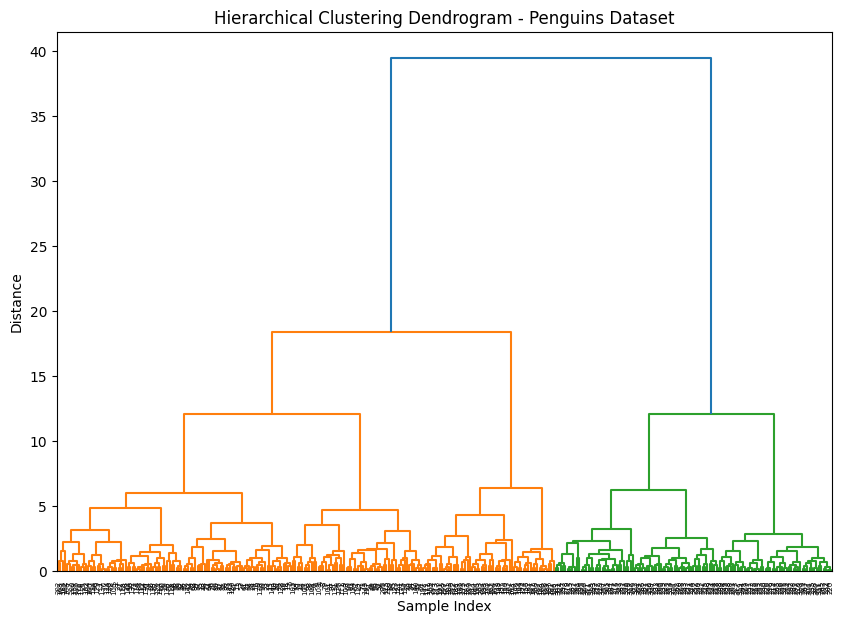

In [ ]:
linked = linkage(X_scaled, method='ward')

# Vẽ dendrogram để quan sát cấu trúc phân cụm
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram - Penguins Dataset')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

##Agglomerative Clustering

In [ ]:
ac = AgglomerativeClustering(n_clusters=3, linkage='ward')
ac_clusters = ac.fit_predict(X_scaled)

# Gắn nhãn cụm vào dataframe gốc
penguins_clean['Cluster'] = ac_clusters
penguins_clean.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Cluster
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,1


##Vẽ biểu đồ phân cụm


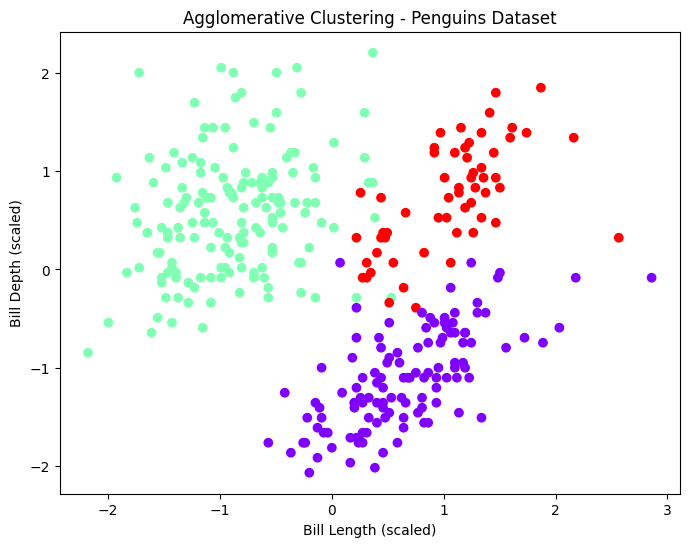

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=ac_clusters, cmap='rainbow')
plt.title('Agglomerative Clustering - Penguins Dataset')
plt.xlabel('Bill Length (scaled)')
plt.ylabel('Bill Depth (scaled)')
plt.show()


## Summary

- **Hierarchical Clustering:**
  - **Cluster 0:** Penguins with **longer bills** and **heavier bodies**, representing the **Gentoo** species group.  
  - **Cluster 1:** Penguins with **shorter bills** and **lighter bodies**, mostly corresponding to the **Adelie** species.  
  - **Cluster 2:** Penguins with **moderate bill size** and **medium body weight**, similar to the **Chinstrap** species.  

Overall, the hierarchical model successfully grouped penguins into three distinct clusters that align closely with their physical and species characteristics.



#3.2.4. Bài tập thực hành phân cụm đa cấp 2

##Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [ ]:
import kagglehub

# Tên file và đường dẫn Kaggle
file_path = "OnlineRetail.csv"
dataset_name = "hellbuoy/online-retail-customer-clustering"

# Kiểm tra file có sẵn không, nếu chưa thì tải từ KaggleHub
if os.path.exists(file_path):
    print("File đã có sẵn:", file_path)
else:
    print("File chưa tồn tại, đang tải dữ liệu từ Kaggle...")
    path = kagglehub.dataset_download(dataset_name)
    full_path = os.path.join(path, file_path)
    data = pd.read_csv(full_path, encoding="ISO-8859-1")
    data.to_csv(file_path, index=False)
    print("Tải file thành công:", file_path)

# Đọc dữ liệu
df = pd.read_csv(file_path, encoding="ISO-8859-1")
print("Dữ liệu:", df.shape)
df.head()

File đã có sẵn: OnlineRetail.csv
Dữ liệu: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.isna().sum()/df.shape[0]*100

,0
InvoiceNo,0.000000
StockCode,0.000000
Description,0.268311
Quantity,0.000000
InvoiceDate,0.000000
UnitPrice,0.000000
CustomerID,24.926694
Country,0.000000


In [ ]:
df.describe()


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


##Cleaning

###Handling Nan

In [ ]:
# # Fill NaN values in 'CustomerID' with unique values
# #  (if we need them and will not affect the data to fill nan with new IDs)


# na_id = df[df['CustomerID'].isna()].index
# New_id = int(df['CustomerID'].max()) + 1
# new_ids = range(New_id, New_id + len(na_id))
# df.loc[na_id, 'CustomerID'] = new_ids

In [ ]:
df.dropna(subset=['CustomerID'], inplace=True)

In [ ]:
df['CustomerID'].isna().sum()

np.int64(0)

Description

In [ ]:
df['Description'] = df['Description'].fillna('No Description')

In [ ]:
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


###Correcting columns types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [ ]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom


In [ ]:
# df['InvoiceNo'] = df['InvoiceNo'].astype(int)
# I knew from the error that there is a value can not be converted

In [ ]:
df = df[~df['InvoiceNo'].astype(str).str.contains('C', na=False)]
df['InvoiceNo'] = df['InvoiceNo'].astype(int)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='mixed')
df['CustomerID'] = df['CustomerID'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  int64         
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  int64         
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 27.3+ MB


###Feature Engineering

Amount

In [ ]:
df['Amount'] = df['Quantity'] * df['UnitPrice']
Camount = df.groupby('CustomerID')['Amount'].sum().reset_index()
Camount.head()

,CustomerID,Amount
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


Frequency

In [ ]:
freq = df.groupby('CustomerID')['InvoiceNo'].count().reset_index()
freq.columns = ['CustomerID', 'Frequency']
freq.head()

,CustomerID,Frequency
0,12346,1
1,12347,182
2,12348,31
3,12349,73
4,12350,17


In [ ]:
rfm = pd.merge(Camount, freq, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Amount,Frequency
0,12346,77183.60,1
1,12347,4310.00,182
2,12348,1797.24,31
3,12349,1757.55,73
4,12350,334.40,17


Difference

In [ ]:
df['dif'] = max(df['InvoiceDate']) - df['InvoiceDate']
df['dif'] = df['dif'].dt.days
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,dif
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom,15.30,697
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34,697
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850,United Kingdom,22.00,697
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34,697
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34,697


In [ ]:
last = df.groupby('CustomerID')['dif'].min().reset_index()
last.head()

,CustomerID,dif
0,12346,326
1,12347,40
2,12348,76
3,12349,19
4,12350,311


Final dataframe

In [ ]:
rfm = pd.merge(rfm, last, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346,77183.60,1,326
1,12347,4310.00,182,40
2,12348,1797.24,31,76
3,12349,1757.55,73,19
4,12350,334.40,17,311


###Outliers

In [ ]:
rfm.describe()

,CustomerID,Amount,Frequency,Recency
count,4339.000000,4339.000000,4339.000000,4339.000000
mean,15299.936852,2053.793018,91.708689,105.430053
std,1721.889758,8988.248381,228.792852,115.075862
min,12346.000000,0.000000,1.000000,0.000000
25%,13812.500000,307.245000,17.000000,22.000000
50%,15299.000000,674.450000,41.000000,61.000000
75%,16778.500000,1661.640000,100.000000,161.500000
max,18287.000000,280206.020000,7847.000000,697.000000


In [ ]:
Q1 = rfm[['Recency', 'Frequency', 'Amount']].quantile(0.25)
Q3 = rfm[['Recency', 'Frequency', 'Amount']].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [ ]:
filtered = rfm[
    (rfm['Recency'] >= lower['Recency']) & (rfm['Recency'] <= upper['Recency']) &
    (rfm['Frequency'] >= lower['Frequency']) & (rfm['Frequency'] <= upper['Frequency']) &
    (rfm['Amount'] >= lower['Amount']) & (rfm['Amount'] <= upper['Amount'])
]

In [ ]:
filtered.describe()

,CustomerID,Amount,Frequency,Recency
count,3682.000000,3682.000000,3682.000000,3682.000000
mean,15312.727594,843.231226,50.756382,106.373438
std,1714.182234,784.852084,47.376080,96.497657
min,12348.000000,0.000000,1.000000,0.000000
25%,13827.250000,281.935000,15.000000,25.000000
50%,15312.500000,570.480000,34.000000,72.000000
75%,16799.000000,1142.847500,73.000000,172.000000
max,18287.000000,3692.280000,223.000000,363.000000


##Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
rfm = filtered[['Amount', 'Frequency', 'Recency']]
rfm_scaled = scaler.fit_transform(rfm)
rfm_scaled = pd.DataFrame(rfm_scaled, columns=['Amount', 'Frequency', 'Recency'])
rfm_scaled.head()

,Amount,Frequency,Recency
0,1.215692,-0.417068,-0.314801
1,1.165115,0.469575,-0.905569
2,-0.648403,-0.712616,2.120822
3,2.118915,0.722902,-0.345894
4,-0.961116,-0.987054,1.011836


##Hierarchical Clustering

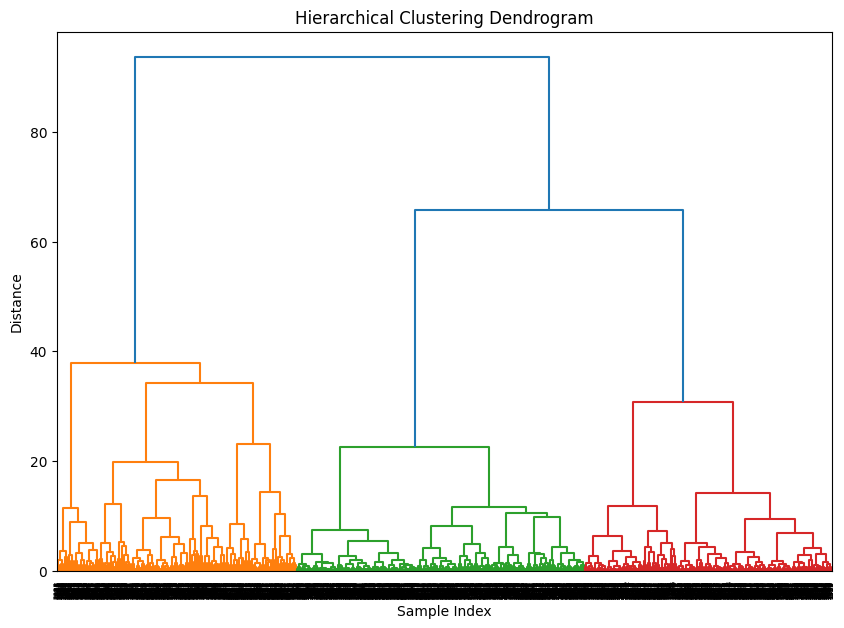

In [ ]:
linked = linkage(rfm_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='decreasing', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

***Based on the plot 3 cluster will be good***

In [ ]:
n_clusters = 3
hierarchical_cluster = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
filtered['Hierarchical_Cluster'] = hierarchical_cluster.fit_predict(rfm_scaled)

display(filtered.head())

,CustomerID,Amount,Frequency,Recency,Hierarchical_Cluster
2,12348,1797.24,31,76,0
3,12349,1757.55,73,19,0
4,12350,334.40,17,311,1
5,12352,2506.04,85,73,0
6,12353,89.00,4,204,1


In [ ]:
hierarchical_cluster_means = filtered.groupby('Hierarchical_Cluster')[['Amount', 'Frequency', 'Recency']].mean()
print(hierarchical_cluster_means)

                           Amount   Frequency     Recency
Hierarchical_Cluster                                     
0                     1703.688659  104.507895   67.599123
1                      345.030136   20.772379  218.113384
2                      553.580682   31.687363   42.919649


### Visualize hierarchical clusters

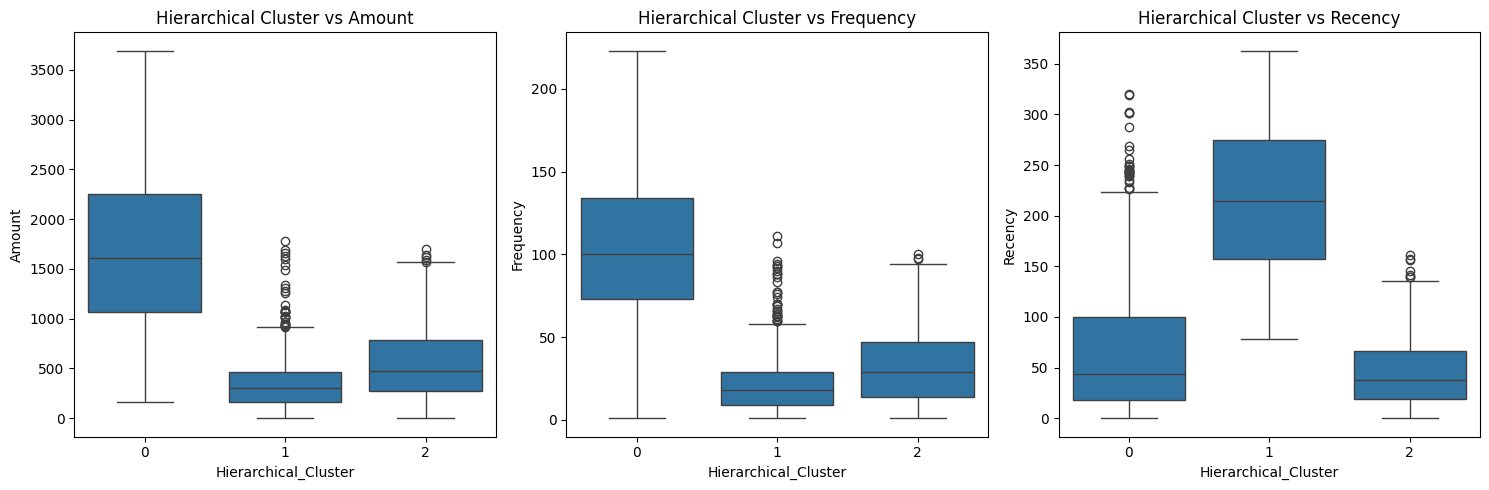

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='Hierarchical_Cluster', y='Amount', data=filtered)
plt.title('Hierarchical Cluster vs Amount')

plt.subplot(1, 3, 2)
sns.boxplot(x='Hierarchical_Cluster', y='Frequency', data=filtered)
plt.title('Hierarchical Cluster vs Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(x='Hierarchical_Cluster', y='Recency', data=filtered)
plt.title('Hierarchical Cluster vs Recency')

plt.tight_layout()
plt.show()

# Summary:

*   **Hierarchical Clustering:**
    *   Cluster 0: High average Amount (\$1703.69) and Frequency (104.51), with relatively low average Recency (67.60).
    *   Cluster 1: Low average Amount (\$345.03) and Frequency (20.77), with high average Recency (218.11).
    *   Cluster 2: Moderate average Amount (\$553.58) and Frequency (31.69), with low average Recency (42.92).